# Stock Prediction

We are using historical data from yahoo's finance api's to predict the stock prick for a given stock symbol, given other stock symbols. In addition to the normal pandas and numpy libraries, We are also using Prophet (https://facebook.github.io/prophet/docs/quick_start.html), which is a forecasting library released by the Facebook core datascience team. It implements a procedure for forecasting trends are fit with yearly, weekly, and daily seasonality, plus holiday effects.


In [1]:
!conda install -c conda-forge fbprophet -y
!pip install --upgrade plotly
!pip install yfinance



import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
failed                                                                        

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - fbprophet -> python[version='2.7.*|3.5.*|3.6.*|>=2.7,<2.8.0a0|>=3.6,<3.7.0a0|>=3.7,<3.8.0a0|>=3.8,<3.9.0a0|>=3.5,<3.6.0a0']

Your python: python=3.9

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python

ModuleNotFoundError: No module named 'fbprophet'

    Now we load the data. We can specify the start and end dates and also the stock symbol.

In [10]:
import pandas_datareader.data as web
import datetime
import numpy as np
import yfinance as yf

# change this to your desired stock symbol to get results
stockSymbol = 'SBIN.NS'
# Considering data from 2000 to 2022
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2022, 1, 21)

# we now get data for that stock symbol from yahoo finance api
df = yf.download( stockSymbol, start , end)
print(df.head())

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-01-04  227.500000  230.000000  227.500000  229.119995  202.633820   
2010-01-05  230.800003  231.000000  228.009995  229.205002  202.708954   
2010-01-06  229.699997  231.500000  228.500000  230.580002  203.925018   
2010-01-07  230.600006  231.000000  228.110001  229.289993  202.784119   
2010-01-08  229.399994  230.389999  228.009995  228.604996  202.178345   

              Volume  
Date                  
2010-01-04  11031470  
2010-01-05  11613740  
2010-01-06  14527930  
2010-01-07   8576510  
2010-01-08  10453820  


In [11]:
# Now we can get an array of only the closing values and plot the data
close = df['Close']

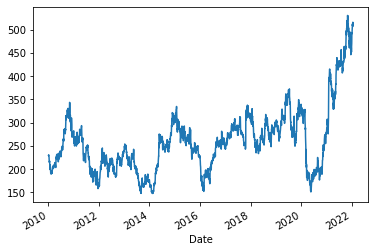

In [12]:
#Plotting the data
close.plot();

In [13]:
# We now reformat the data frame to have columns 'ds' and 'y' with the dates and values respectively which is needed
# by prophet. We also take the log of the values to get more managable values
close_df = close.reset_index().rename(columns={'Date':'ds', 'Close':'y'})
close_df['y'] = np.log(close_df['y'])

In [14]:
# Now we create the prophet model with daily seasonality to be true
model = Prophet(daily_seasonality=True)
model.fit(close_df)
# 5* 365 = 1825.Forecasting for 5 years from now. 
future = model.make_future_dataframe(periods=1825) 
forecast = model.predict(future)
print(forecast)

NameError: name 'Prophet' is not defined

In [15]:
model.plot(forecast)

NameError: name 'model' is not defined

# We can now do a performance evaluation of the result obtained from this.

In [45]:
# to do an evaluation, we join the dataframe df with the forecast obtained. We transform it by dropping na and just taking 
# the yhat, upper, lower and close values.
data = forecast.set_index('ds').join(df)
data = data[['Close', 'yhat', 'yhat_upper', 'yhat_lower' ]].dropna().tail(500)
data['yhat']=np.exp(data.yhat)
data['yhat_upper']=np.exp(data.yhat_upper)
data['yhat_lower']=np.exp(data.yhat_lower)

In [46]:
data

,Close,yhat,yhat_upper,yhat_lower
ds,,,,
2017-01-06,131.070007,114.679300,131.835107,96.492251
2017-01-09,130.949997,116.685963,135.865336,100.714747
2017-01-10,129.889999,117.579759,138.037388,101.708998
2017-01-11,130.500000,118.167084,137.682220,99.769448
2017-01-12,129.179993,119.477904,140.489861,101.755617
2017-01-13,133.699997,120.119127,142.636646,101.624446
2017-01-17,132.889999,124.369699,144.984335,107.347574
2017-01-18,133.259995,125.279105,145.795228,107.011256
2017-01-19,138.410004,126.944769,148.426539,108.468855


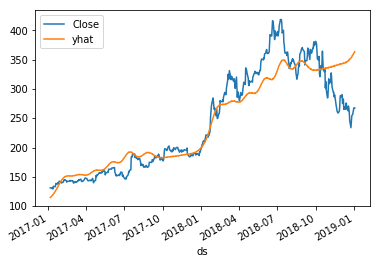

In [47]:
# we can now plot the actual values with predicted ones
data[['Close', 'yhat']].plot()


# Average errors is as below

In [48]:
AE = (data.yhat - data.Close)
print(AE.describe())

count    500.000000
mean      -1.255792
std       31.812232
min     -100.616987
25%      -16.470317
50%        1.334983
75%       10.789524
max      119.173990
dtype: float64


# The R2 score , Mean squared error and Mean absolute error is asbelow

In [49]:
r2_score(data.Close, data.yhat)


0.8613139983370754

In [50]:
mean_squared_error(data.Close, data.yhat)

1011.5710595526581

In [51]:
mean_absolute_error(data.Close, data.yhat)

22.395376137336456

# Forecasting with y upper and y lower confidence

Text(0.5, 0, 'Date')

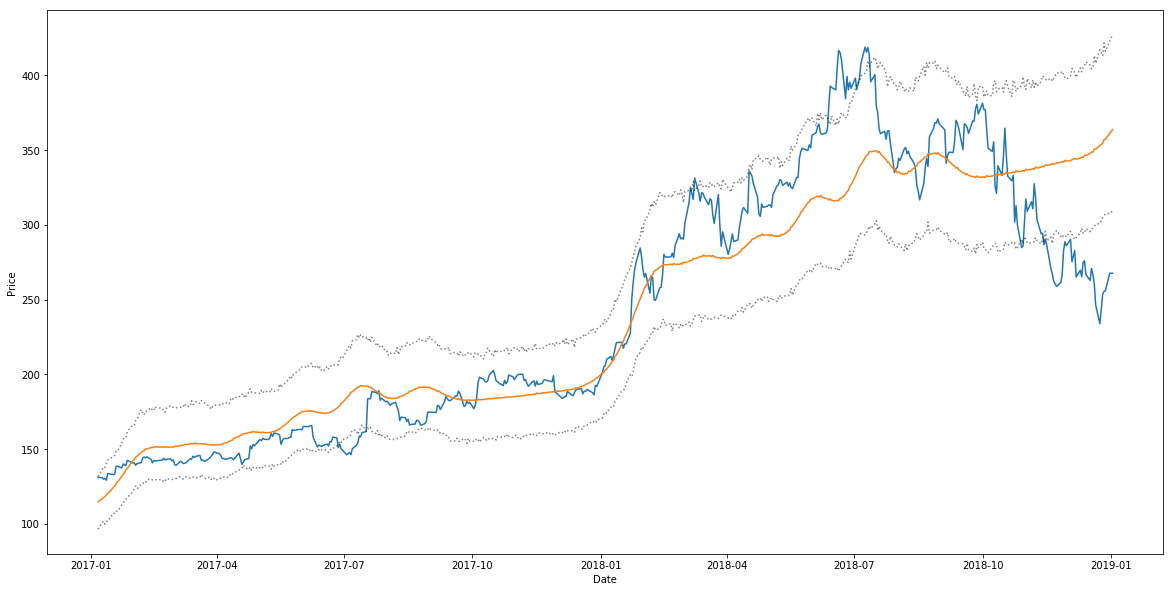

In [52]:
plt.rcParams['figure.figsize']=(20,10)
fig, ax1 = plt.subplots()
ax1.plot(data.Close)
ax1.plot(data.yhat)
ax1.plot(data.yhat_upper, color='black',  linestyle=':', alpha=0.5)
ax1.plot(data.yhat_lower, color='black',  linestyle=':', alpha=0.5)
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

In [9]:
import pickle

# read the Prophet model object
with open('./../../resources/fbprophet/model/AARTIIND.NS.pkl', 'rb') as f:
    m = pickle.load(f)

In [11]:
future = m.make_future_dataframe(periods=10)
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2980,2022-01-26,7.375998,7.276975,7.448330,7.375998,7.375998,-0.014106,-0.014106,-0.014106,0.006647,...,-0.019100,-0.019100,-0.019100,-0.001653,-0.001653,-0.001653,0.0,0.0,0.0,7.361892
2981,2022-01-27,7.376445,7.280961,7.451429,7.376445,7.376445,-0.012680,-0.012680,-0.012680,0.006647,...,-0.016905,-0.016905,-0.016905,-0.002423,-0.002423,-0.002423,0.0,0.0,0.0,7.363765
2982,2022-01-28,7.376893,7.275881,7.446600,7.376893,7.376893,-0.013153,-0.013153,-0.013153,0.006647,...,-0.016674,-0.016674,-0.016674,-0.003126,-0.003126,-0.003126,0.0,0.0,0.0,7.363740
2983,2022-01-29,7.377340,7.312842,7.470937,7.377340,7.377340,0.017263,0.017263,0.017263,0.006647,...,0.014368,0.014368,0.014368,-0.003752,-0.003752,-0.003752,0.0,0.0,0.0,7.394603
2984,2022-01-30,7.377787,7.375164,7.540358,7.377787,7.377787,0.078851,0.078851,0.078851,0.006647,...,0.076495,0.076495,0.076495,-0.004291,-0.004291,-0.004291,0.0,0.0,0.0,7.456639


In [8]:
Step 1: Uninstall pystan

pip uninstall pystan
Step 2: Install pystan version ~2.14

pip install pystan~=2.14
**Step 3: Try installing fbprophet again **

pip install fbprophet



  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  ERROR: Command errored out with exit status 1:
   command: /Users/arungupta/opt/anaconda3/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/xm/04s2ld0n1jqbwfgytc7tjrf00000gn/T/pip-install-f8e9b71w/fbprophet_56f7b4e365de46ae9516b4eddb62dc43/setup.py'"'"'; __file__='"'"'/private/var/folders/xm/04s2ld0n1jqbwfgytc7tjrf00000gn/T/pip-install-f8e9b71w/fbprophet_56f7b4e365de46ae9516b4eddb62dc43/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/xm/04s2ld0n1jqbwfgytc7tjrf00000gn/T/pip-wheel-idz4gh84
       cwd: /private/var/folders/xm/04s2ld0n1jqbwfgytc7tjrf00000gn/T/pip-install-f8e9b71w/fbprophet_56f7b4e365de46ae9516b4eddb62dc43/
  Complete out

In [51]:
import datetime

import yfinance as yf

import pandas as pd
import numpy as np
from fbprophet import Prophet
from pathlib import Path

# Considering data from 2000 to 2022
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2022, 1, 22)

stocks = Path('./../../resources/stock_list.txt').read_text().split("\n")
index=1
for s in stocks:
    print(s)
    df = yf.download( s, start , end)
    close = df['Close']

    close_df = close.reset_index().rename(columns={'Date':'ds', 'Close':'y'})
    close_df['y'] = np.log(close_df['y'])
    model = Prophet(daily_seasonality=True)
    model.fit(close_df)
    pkl_path = "./../../resources/fbprophet/model/"+s+".model"
    with open(pkl_path, "wb") as f:
        pickle.dump(model, f)

    # save the dataframe
    forecast.to_pickle("./../../resources/fbprophet/forecast/"+s+".forecast")
    print(index,"*** Data Saved for -> ",s)
    index = index+1



AARTIIND.NS
[*********************100%***********************]  1 of 1 completed
Initial log joint probability = -5.99221
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       10062.9     0.0115149       7933.31           1           1      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       10596.1     0.0173374       3914.71           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       10897.6     0.0145858       6034.68           1           1      361   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       11126.1    0.00156381       4342.35           1           1      473   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       11270.8    0.00249612       3931.37           1        

In [63]:
selected_stock = 'ZEEL.NS'
model_file_path = './../../resources/fbprophet/model/'+ selected_stock+'.model'

# read the Prophet model object
with open(pkl_path, 'rb') as f:
    m = pickle.load(f)

future = m.make_future_dataframe(periods=10)
forecast = m.predict(future)


In [64]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2981,2022-01-27,5.316671,5.261297,5.575315,5.316671,5.316671,0.101561,0.101561,0.101561,0.051584,...,0.033563,0.033563,0.033563,0.016414,0.016414,0.016414,0.0,0.0,0.0,5.418232
2982,2022-01-28,5.316617,5.253724,5.566573,5.316617,5.316617,0.094613,0.094613,0.094613,0.051584,...,0.030270,0.030270,0.030270,0.012758,0.012758,0.012758,0.0,0.0,0.0,5.411230
2983,2022-01-29,5.316563,5.035175,5.350801,5.316563,5.316563,-0.123513,-0.123513,-0.123513,0.051584,...,-0.184203,-0.184203,-0.184203,0.009106,0.009106,0.009106,0.0,0.0,0.0,5.193050
2984,2022-01-30,5.316509,5.245233,5.567911,5.316509,5.316509,0.090000,0.090000,0.090000,0.051584,...,0.032918,0.032918,0.032918,0.005497,0.005497,0.005497,0.0,0.0,0.0,5.406509
2985,2022-01-31,5.316456,5.226923,5.563859,5.316456,5.316456,0.081794,0.081794,0.081794,0.051584,...,0.028236,0.028236,0.028236,0.001974,0.001974,0.001974,0.0,0.0,0.0,5.398249


In [65]:
df = yf.download( selected_stock, start , end)


[*********************100%***********************]  1 of 1 completed


In [66]:
data = forecast.set_index('ds').join(df)
data = data[['Close', 'yhat', 'yhat_upper', 'yhat_lower' ]].dropna().tail(500)
data['yhat']=np.exp(data.yhat)
data['yhat_upper']=np.exp(data.yhat_upper)
data['yhat_lower']=np.exp(data.yhat_lower)

In [67]:
data.tail()

,Close,yhat,yhat_upper,yhat_lower
ds,,,,
2022-01-17,323.600006,231.268370,271.295518,195.748369
2022-01-18,316.600006,230.660787,272.081512,194.720207
2022-01-19,317.549988,230.892466,273.503959,194.844435
2022-01-20,308.450012,230.790378,274.011432,196.139144
2022-01-21,289.350006,229.374971,270.655476,196.078787


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-27,332.000000,333.700012,315.500000,317.950012,317.950012,22394765
2021-12-28,317.950012,325.399994,317.000000,321.500000,321.500000,14889633
2021-12-29,322.000000,324.850006,316.700012,317.950012,317.950012,10749681
2021-12-30,319.799988,321.500000,314.000000,318.100006,318.100006,13792892
2021-12-31,319.100006,323.000000,318.350006,320.799988,320.799988,7867316
2022-01-03,318.649994,324.500000,318.649994,322.950012,322.950012,5400666
2022-01-04,324.600006,329.399994,321.149994,322.350006,322.350006,8071486
2022-01-05,322.500000,322.799988,317.399994,319.049988,319.049988,5910270
2022-01-06,316.250000,325.600006,315.250000,324.549988,324.549988,8785346
